In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### MERGING 12 MONTHS OF DATA IN A SINGLE FILE

In [4]:
df = pd.DataFrame()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in months:
    d_f = pd.read_csv(f"Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_{i}_2019.csv")
    df = pd.concat([df, d_f])

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [5]:
df.to_csv('merged_data.csv', index=False)

#### 1. What was the best month for sales? How much was earned that month?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
df[df.isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
25112,NaN,NaN,NaN,NaN,NaN,NaN
25113,NaN,NaN,NaN,NaN,NaN,NaN
25114,NaN,NaN,NaN,NaN,NaN,NaN
25115,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna()

In [9]:
df["Month"] = df["Order Date"].str[0:2]
df.Month.value_counts()
df = df[df["Month"] != "Or"]
df.Month = df.Month.astype('int')


C:\Users\adity\AppData\Local\Temp\ipykernel_13444\209710948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Order Date"].str[0:2]


In [10]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [11]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [12]:
df[["Month", "Sales"]].groupby('Month').sum().sort_values(by='Sales', ascending=False)

,Sales
Month,
12,4613443.34
10,3736726.88
4,3390670.24
11,3199603.20
5,3152606.75
3,2807100.38
7,2647775.76
6,2577802.26
8,2244467.88


<Axes: xlabel='Month'>

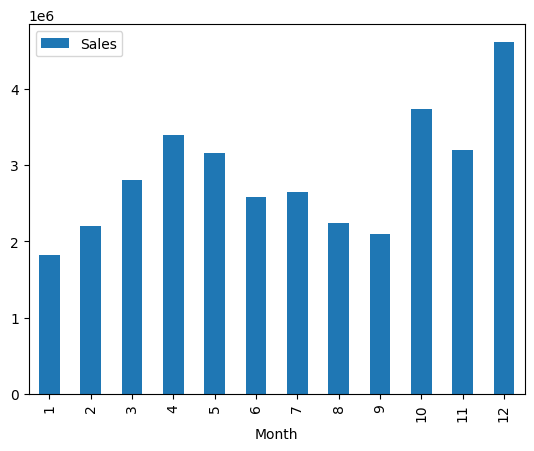

In [13]:
df[["Month", "Sales"]].groupby('Month').sum().plot(kind='bar')

#### What city has the highest number of Sales?

In [14]:
def city(x):
    x = x.split(",")[1]
    return x
def state(x):
    x = x.split(",")[2].split(' ')[1]
    return x

In [15]:
df["Purchase Address"].iloc[0].replace(" ", "").split(",")[1:]

['Boston', 'MA02215']

In [16]:
df["City"] = df["Purchase Address"].apply(lambda x: city(x) + ' ' + state(x))

In [17]:
df[["City", "Sales"]].groupby('City').sum().sort_values(by='Sales', ascending=False)

,Sales
City,
San Francisco CA,8262203.91
Los Angeles CA,5452570.80
New York City NY,4664317.43
Boston MA,3661642.01
Atlanta GA,2795498.58
Dallas TX,2767975.40
Seattle WA,2747755.48
Portland OR,1870732.34
Austin TX,1819581.75


<Axes: xlabel='City'>

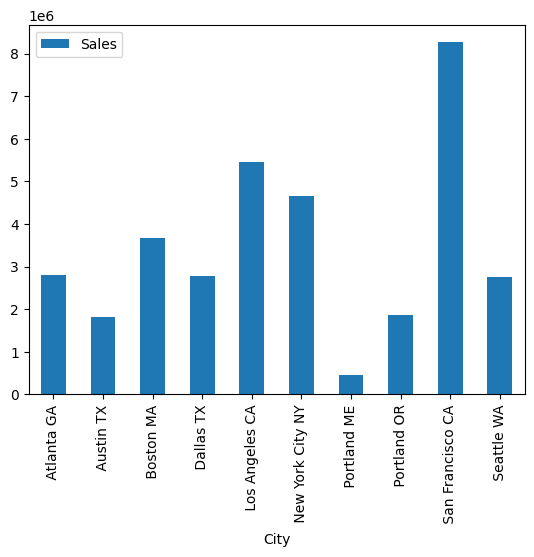

In [18]:
df[["City", "Sales"]].groupby('City').sum().plot(kind='bar')

#### What time should we display adverts to maximize the likelihood of customers buying the products?

In [19]:
df["Order Date"].iloc[0].split(' ')[1].split(":")[0]

'21'

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df

C:\Users\adity\AppData\Local\Temp\ipykernel_13444\3978931363.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco CA
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles CA
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle WA
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas TX


In [21]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59
...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco CA,20,58
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles CA,12,1
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle WA,6,43
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas TX,10,39


In [22]:
df[["Hour", "Sales"]].groupby('Hour').sum().sort_values(by='Sales', ascending=False)

,Sales
Hour,
19,2412938.54
12,2316821.34
11,2300610.24
20,2281716.24
18,2219348.30
13,2155389.80
17,2129361.61
14,2083672.73
21,2042000.86


<Axes: xlabel='Hour'>

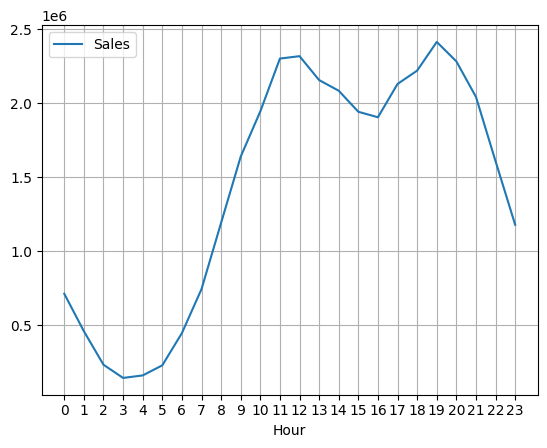

In [28]:
hours = [hour for hour, df in df.groupby('Hour')]
df[["Hour", "Sales"]].groupby('Hour').sum().plot(kind='line', grid=True, xticks=df.Hour.unique())

#### What products are most often sold together?

In [38]:
new_df = df[df['Order ID'].duplicated(keep=False)]
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\adity\AppData\Local\Temp\ipykernel_13444\3577335906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [45]:
new_df = new_df[['Order ID', 'Grouped']].drop_duplicates()

new_df

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
24977,319536,"Macbook Pro Laptop,Wired Headphones"
24998,319556,"Google Phone,Wired Headphones"
25027,319584,"iPhone,Wired Headphones"
25040,319596,"iPhone,Lightning Charging Cable"


In [49]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df.Grouped:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))


count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### What product sold the most? and Why?

In [51]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


In [56]:
df[["Product", "Quantity Ordered"]].groupby('Product').sum().sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


<Axes: xlabel='Product'>

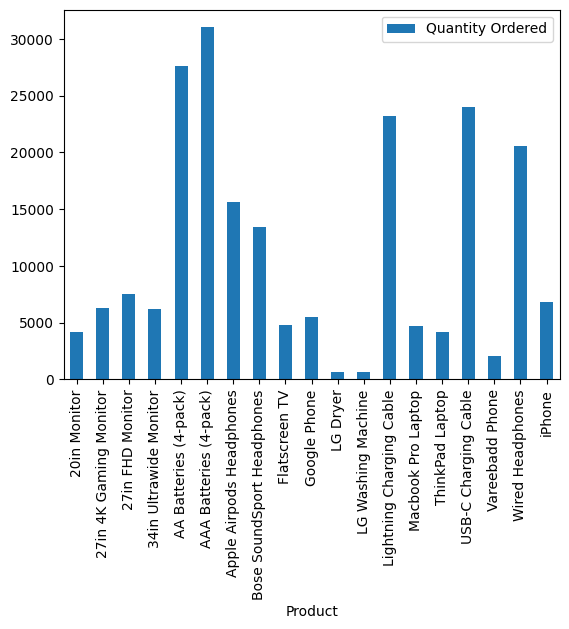

In [57]:
df[["Product", "Quantity Ordered"]].groupby('Product').sum().plot(kind='bar')

In [61]:
df[['Product', 'Price Each']].groupby('Product').mean()

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


<Axes: xlabel='Product'>

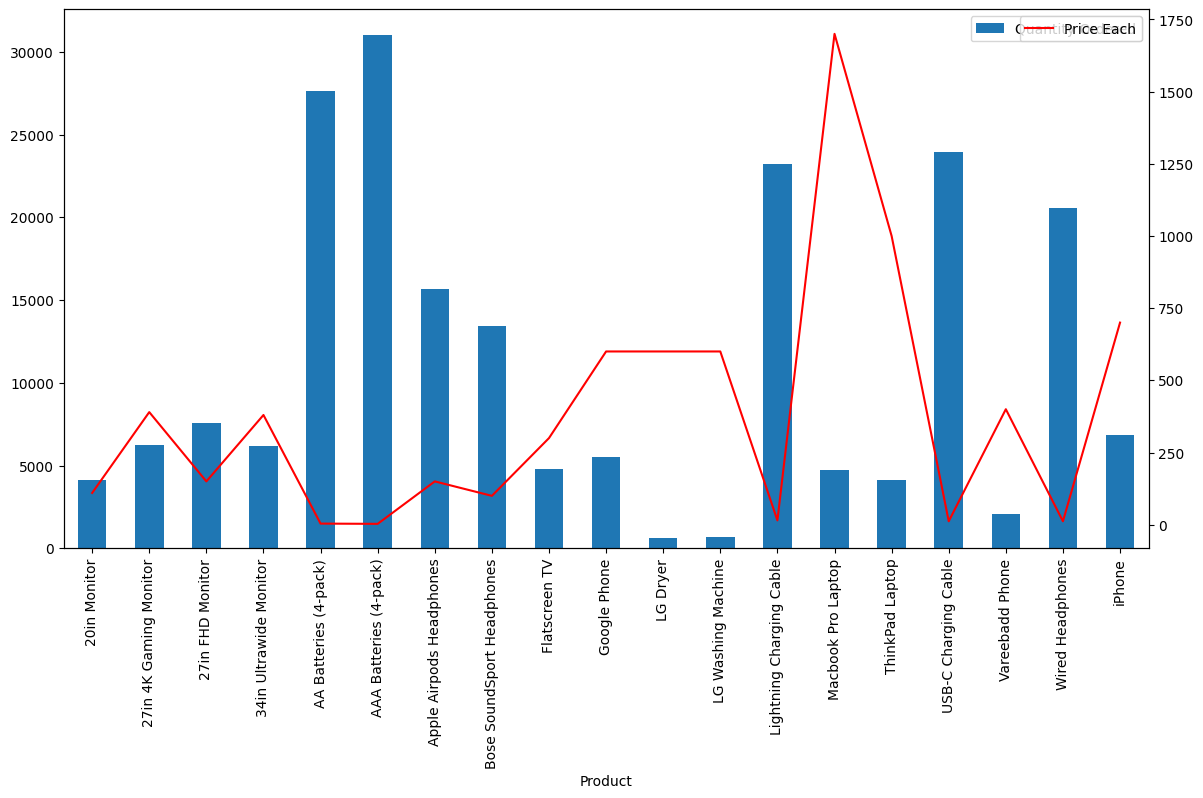

In [64]:
ax1 = df[["Product", "Quantity Ordered"]].groupby('Product').sum().plot(figsize=(14,7),kind='bar')
ax2 = ax1.twinx()
df[['Product', 'Price Each']].groupby('Product').mean().plot(ax=ax2,figsize=(14,7), kind='line', color='red')
